In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.

In [6]:
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [7]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN
2,2167538,https://www.airbnb.com/rooms/2167538,20240316023820,2024-03-18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,790607305500629830,https://www.airbnb.com/rooms/790607305500629830,20240316023820,2024-03-18,city scrape,Luxury double room,Relax in this tranquil and stylish space.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202112801,...,4.77,4.68,4.68,PID-STRA-21723,f,30,5,25,0,2.13
4,641106357139201992,https://www.airbnb.com/rooms/641106357139201992,20240316023820,2024-03-18,city scrape,Chic Studio Apartment in Prime Bondi Location,Immerse yourself in the vibrant atmosphere of ...,Bondi is one of Australia’s most iconic suburb...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,3.94,4.94,4.29,PID-STRA-36651,f,217,217,0,0,0.84


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [8]:
listing_data.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2855,786675216193413237,https://www.airbnb.com/rooms/786675216193413237,20240316023820,2024-03-18,city scrape,Darlinghurst Delight,Truly unique & beautifully presented inner cit...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,41215678,...,5.00,5.00,5.00,PID-STRA-45650,f,28,28,0,0,0.20
8398,2299737,https://www.airbnb.com/rooms/2299737,20240316023820,2024-03-18,city scrape,Metro Apartments on Darling Harbour,Loft style apartments close to Darling Harbour...,Ideally located on the city side of Darling Ha...,https://a0.muscache.com/pictures/76c06abb-fc7f...,11747646,...,4.65,4.81,4.51,Exempt,f,2,1,0,0,6.72
8092,21194839,https://www.airbnb.com/rooms/21194839,20240316023820,2024-03-18,city scrape,Cosy house in the trees on Pittwater,Our cosy cabin is set-back from the water up t...,Coasters Retreat is a small friendly community...,https://a0.muscache.com/pictures/bed02b72-f7e6...,1002864,...,4.91,4.96,4.55,PID-STRA-5270,f,1,1,0,0,0.70
6481,916530762919363568,https://www.airbnb.com/rooms/916530762919363568,20240316023820,2024-03-18,city scrape,Aircabin | Cecil Park | 2.5 Acres Luxury Mansion,When it comes to indulging in grand and opulen...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,484473459,...,5.00,4.82,4.18,PID-STRA-51377,f,62,62,0,0,1.38
5887,52678078,https://www.airbnb.com/rooms/52678078,20240316023820,2024-03-18,city scrape,"Water and Bush Views, what else do you need?",A lovely space amongst the tree tops with bush...,NaN,https://a0.muscache.com/pictures/f46644b7-f3c9...,501392,...,NaN,NaN,NaN,PID-STRA-42836,f,1,1,0,0,NaN


We can also get the list of columns out of the data frame

In [9]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [10]:
row_one = listing_data.iloc[1]
row_one

id                                                                           1096082243192434668
listing_url                                     https://www.airbnb.com/rooms/1096082243192434668
scrape_id                                                                         20240316023820
last_scraped                                                                          2024-03-18
source                                                                               city scrape
                                                                      ...                       
calculated_host_listings_count                                                                 2
calculated_host_listings_count_entire_homes                                                    1
calculated_host_listings_count_private_rooms                                                   1
calculated_host_listings_count_shared_rooms                                                    0
reviews_per_month             

Series objects are _very_ similar to dictionaries. They have more properties though.

In [24]:
row_one["review_scores_rating"]

nan

'Stop on/near marked foot crossing'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [25]:
row_one.review_scores_rating

nan

'Stop on/near marked foot crossing'

Doing the same thing on a dataframe gives us the whole column

In [26]:
listing_data.review_scores_rating

0         NaN
1         NaN
2        4.00
3        4.71
4        4.00
         ... 
14269    4.57
14270    4.87
14271    4.96
14272     NaN
14273    4.98
Name: review_scores_rating, Length: 14274, dtype: float64

<Axes: >

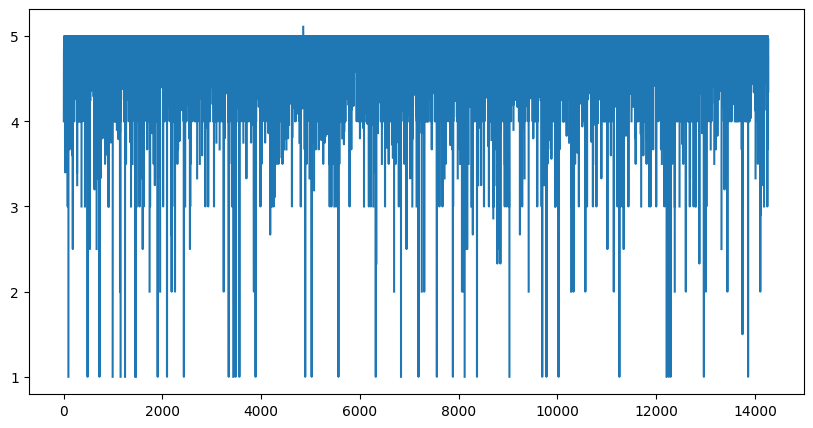

In [27]:
listing_data["review_scores_rating"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

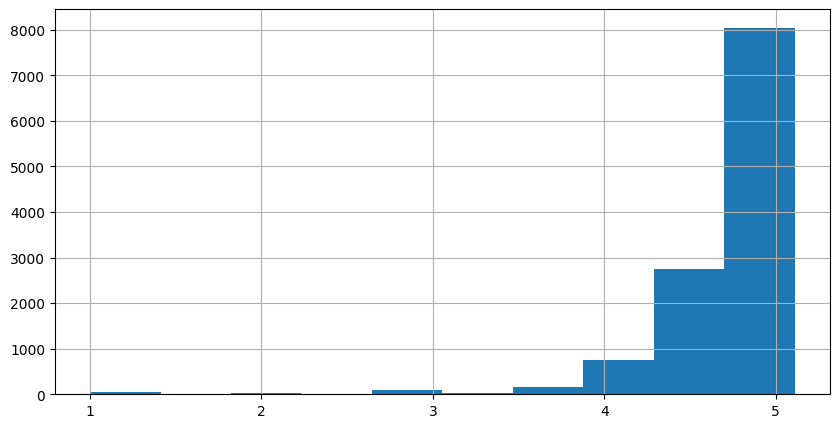

In [28]:
listing_data.review_scores_rating.hist()

Let's exclude all the values above 3 stars, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

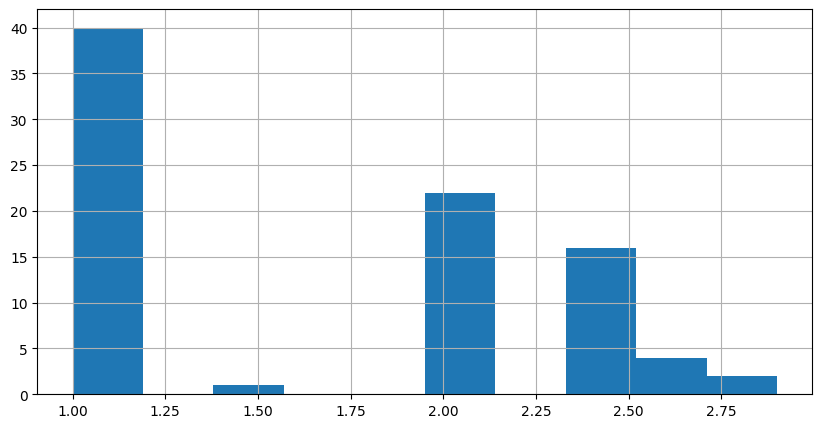

In [32]:
listing_data.review_scores_rating[listing_data.review_scores_rating < 3].hist()

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [33]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

Anyway, back to our fines, it looks like we have a similar pattern of reviews per month here.

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'Amount of listings with reviews above 3 per month')

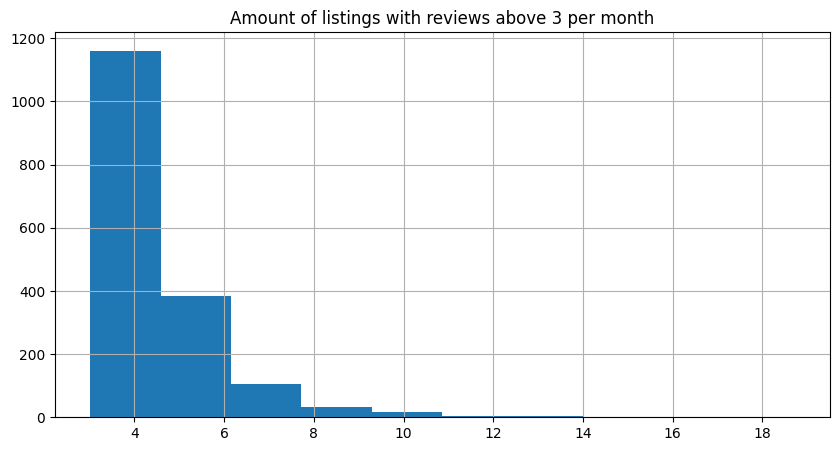

In [39]:
lower_bound = 3
listing_data.reviews_per_month[listing_data.reviews_per_month > lower_bound].hist()
plt.title(f"Amount of listings with reviews above {lower_bound} per month")

Text(0.5, 1.0, 'Amount of listings with reviews above 5 per month')

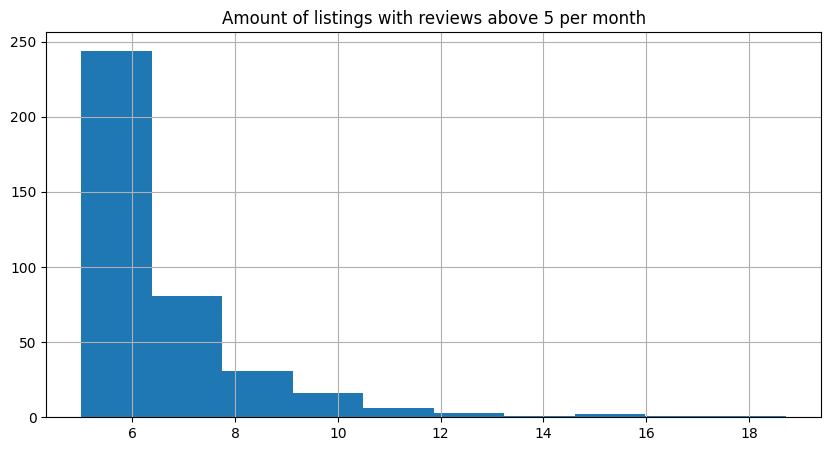

In [40]:
lower_bound = 5
listing_data.reviews_per_month[listing_data.reviews_per_month > lower_bound].hist()
plt.title(f"Amount of listings with reviews above {lower_bound} per month")

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In [41]:
listing_data.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN


In [44]:
listing_data.license.value_counts()

license
Exempt            2104
PID-STRA-27025      32
PID-STRA-32849      29
PID-STRA-21723      28
PID-STRA-50900      20
                  ... 
PID-STRA-49146       1
PID-STRA-50221       1
PID-STRA-59109       1
PID-STRA-42187       1
PID-STRA-2304        1
Name: count, Length: 9126, dtype: int64

<Axes: xlabel='license'>

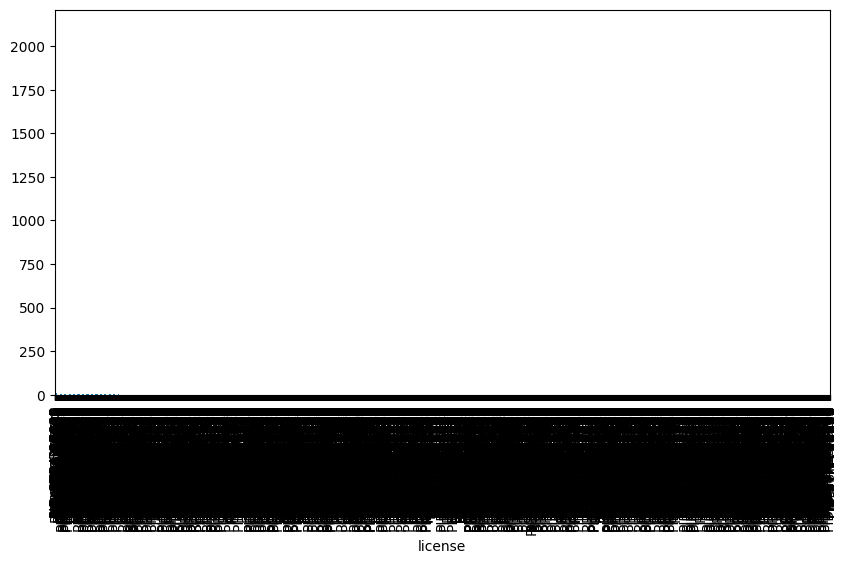

In [45]:
pdvc = listing_data.license.value_counts() # This makes a series
pdvc.plot(kind="bar")

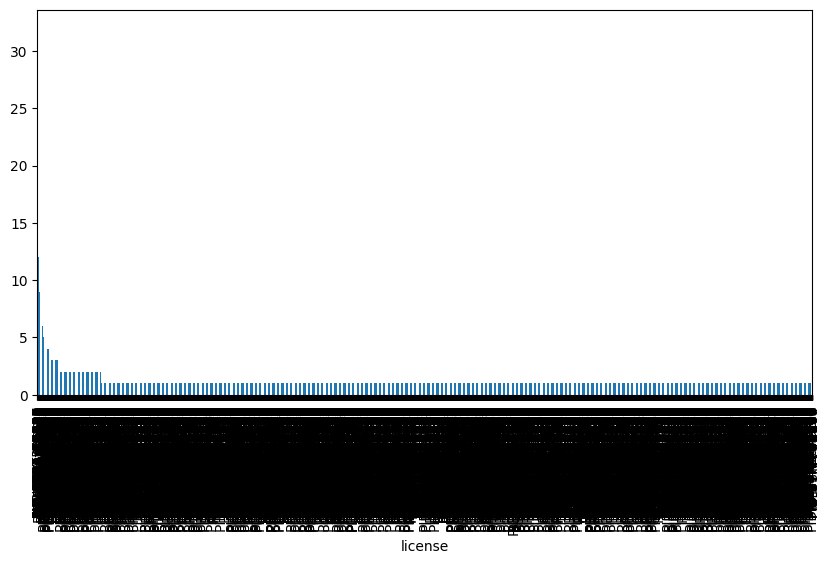

In [49]:
pdvc = listing_data.license.value_counts() 
pdvc[pdvc < 1000].plot(kind="bar");

<Axes: xlabel='license'>

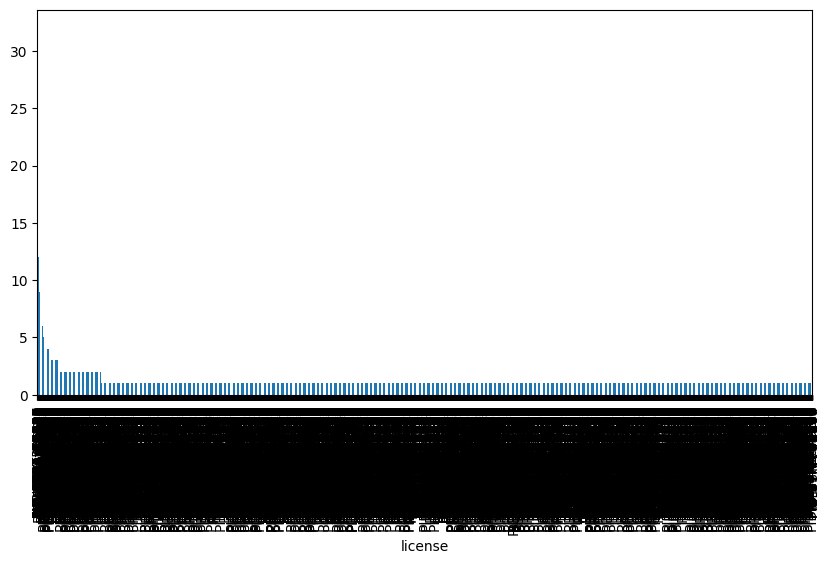

In [50]:
pdvc[pdvc < 100].plot(kind="bar")

<Axes: ylabel='license'>

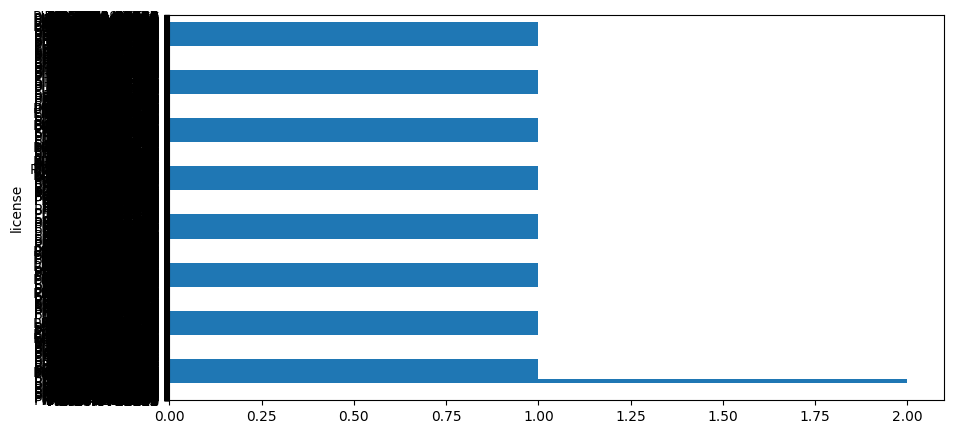

In [51]:
pdvc[pdvc < 3].plot(kind="barh")

In [52]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)

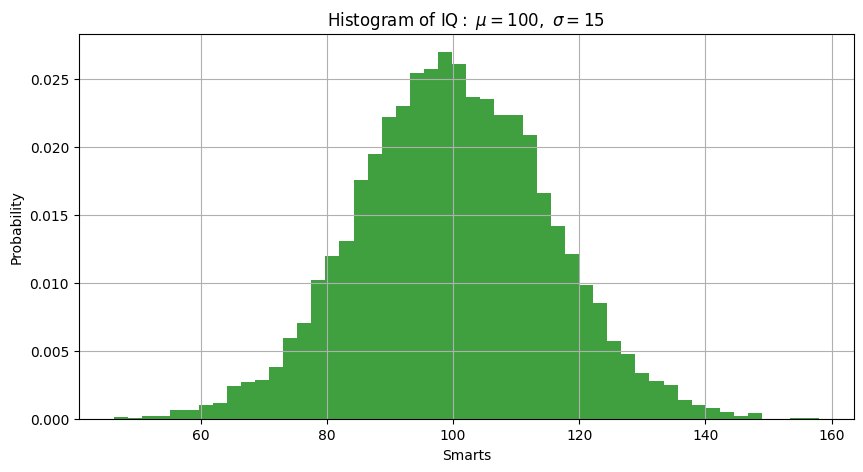

In [53]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()

<Axes: >

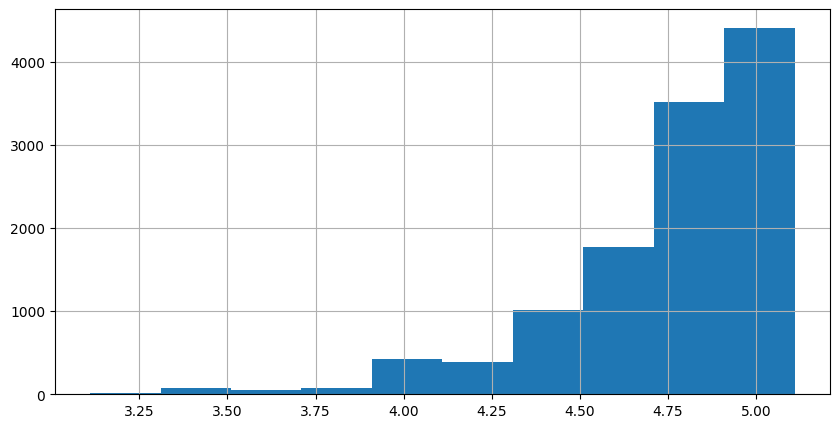

In [70]:
listing_data.review_scores_rating[listing_data.review_scores_rating > 3].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

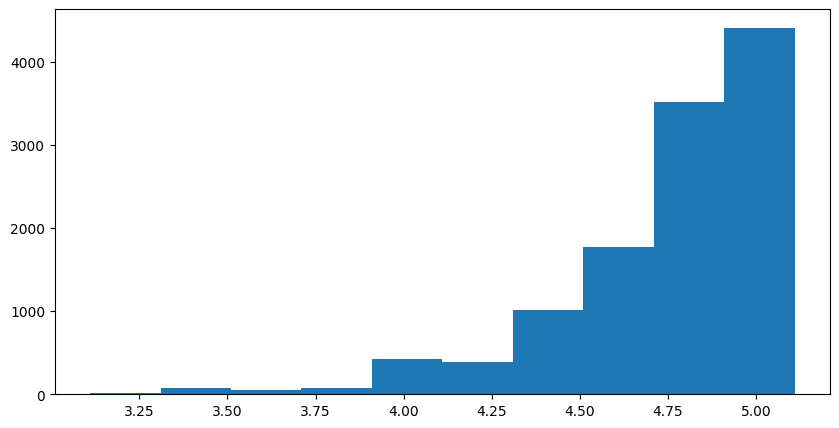

In [71]:
capped_face_value_data = listing_data.review_scores_rating[listing_data.review_scores_rating > 3]

plt.hist(capped_face_value_data)
plt.show()

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

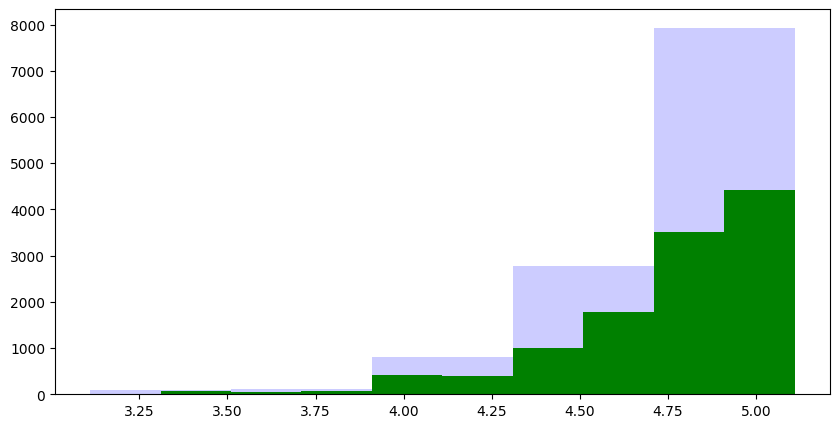

In [72]:
capped_face_value_data = listing_data.review_scores_rating[listing_data.review_scores_rating > 3]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=5, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=10, facecolor="green", alpha=1)  # <-new one
plt.show()

We can go back to our initial, unfiltered, data:

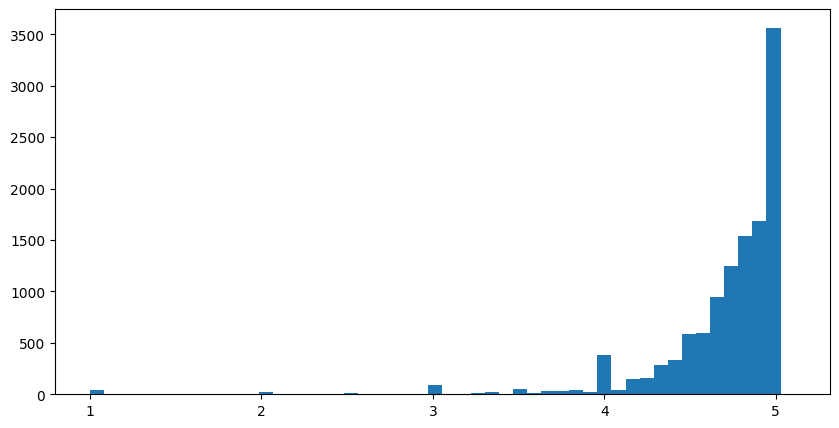

In [73]:
plt.hist(listing_data.review_scores_rating, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

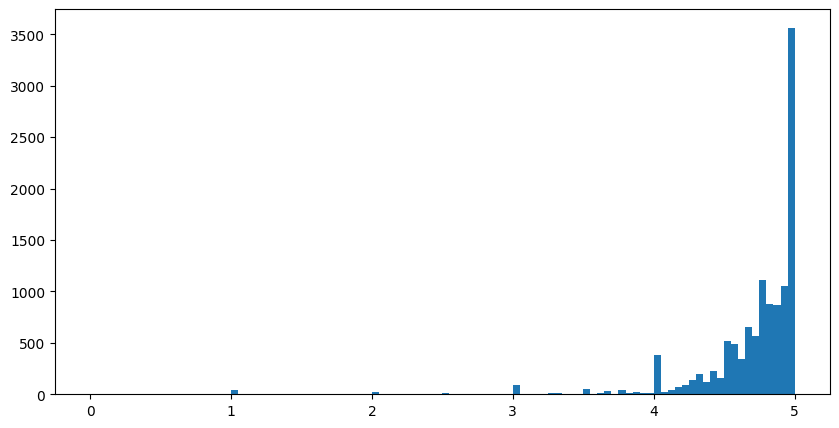

In [78]:
plt.hist(listing_data["review_scores_rating"], bins=100, range=(0, 5))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

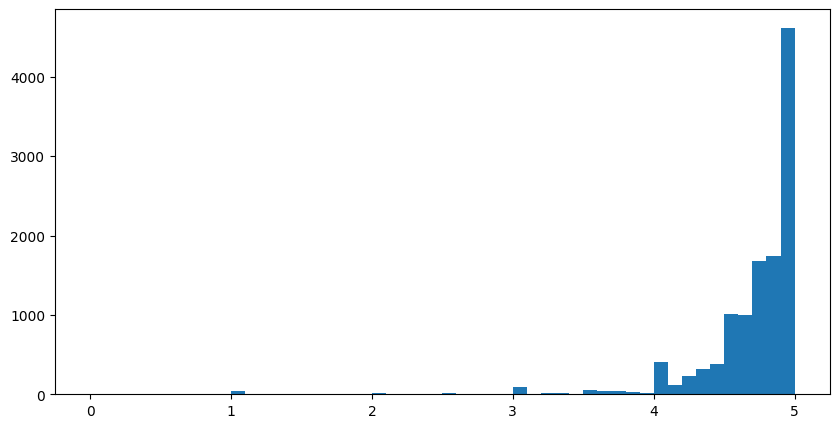

In [77]:
number_of_bins = 50
lower_bound = 0
upper_bound = 5
plt.hist(
    listing_data.review_scores_rating,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

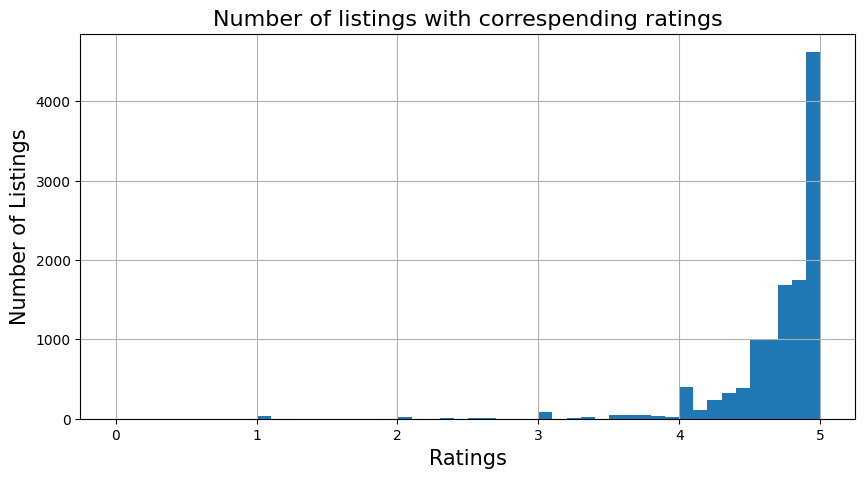

In [81]:
number_of_bins = 50
lower_bound = 0
upper_bound = 5

plt.hist(listing_data.review_scores_rating, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of listings with correspending ratings", fontsize=16)
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("Number of Listings", fontsize=15)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [84]:
listing_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["last_scraped"],
    dayfirst=True,
)
listing_data.head(2)

C:\Users\karen\AppData\Local\Temp\ipykernel_9400\3472650914.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  listing_data = pd.read_csv(
C:\Users\karen\AppData\Local\Temp\ipykernel_9400\3472650914.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  listing_data = pd.read_csv(


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN


We can use a simple `min()` and `max()` method on the column to get the date range.

In [85]:
first_date = listing_data.last_scraped.min()
last_date = listing_data.last_scraped.max()
f"range is: {first_date} to {last_date}"

'range is: 2024-03-16 00:00:00 to 2024-03-18 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox